# Réseaux de neurones

![neural net](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png)

Les réseaux de neurones sont une catégorie de modèles d'intelligence artificielle permettant de répondre à une grande variété de problèmes. Dans cette activité, on s'intéressera aux modèles les **plus simples**.

## Ressources

*Approche haut niveau*

- MIT Introduction to Deep Learning | 6.S191 : https://www.youtube.com/watch?v=7sB052Pz0sQ

- What is a Neural Network? (C1W1L02) : https://www.youtube.com/watch?v=n1l-9lIMW7E

*Approche mathématique*

- Neural Networks Pt. 1: Inside the Black Box : https://www.youtube.com/watch?v=CqOfi41LfDw&t=71s

- Activation Functions (C1W3L06) : https://www.youtube.com/watch?v=Xvg00QnyaIY

## Recherche d'informations

- De quoi est composé un réseau de neurones profond ?
Un réseau de neurones profond (deep neural network) est un modèle de traitement du signal formé de plusieurs couches de neurones connectées entre elles. Les entrées sont transformées par les couches cachées, qui utilisent une fonction d'activation pour produire une sortie.

- Qu'est-ce qu'une fonction d'activation (activation function) ? Donner des exemples de fonctions d'activation
Une fonction d'activation est une fonction mathématique qui détermine si un neurone est activé ou non en fonction de ses entrées. Les exemples courants de fonctions d'activation sont la fonction sigmoïde, la fonction ReLU (rectifiée linear unit) et la fonction tangente hyperbolique.

- Qu'est-ce qu'une époque (epoch) ?
Une époque est un cycle complet d'apprentissage sur l'ensemble de formation dans un réseau de neurones.

- Qu'est-ce que le taux d'apprentissage (learning rate) ?
Le taux d'apprentissage est un nombre réel utilisé pour déterminer la quantité de modification apportée aux poids du réseau lors de chaque mise à jour pendant l'entraînement.

- Qu'est-ce que la fonction de perte (loss function) ?
La fonction de perte est une fonction mathématique utilisée pour évaluer la performance du réseau de neurones sur des données de formation. La valeur de la fonction de perte est utilisée pour ajuster les poids du réseau afin d'améliorer la performance.

- Qu'est-ce qu'un algorithme d'optimisation (optimizer) ? Donner un exemple
Un algorithme d'optimisation est un algorithme utilisé pour ajuster les poids du réseau de neurones afin de minimiser la fonction de perte. Les exemples courants d'algorithmes d'optimisation sont la descente de gradient stochastique (SGD), Adagrad et Adam.

- Qu'est-ce que la régularisation (regularization) ? Donner des exemples de méthodes de régularisation de réseaux de neurones
La régularisation est un mécanisme utilisé pour éviter le surapprentissage dans un réseau de neurones. Les méthodes de régularisation courantes incluent le dropout, la régularisation L1 et L2.

- Qu'est-ce que le batch size (taille du lot) ?
Le batch size est le nombre d'exemples d'entraînement utilisés pour effectuer une mise à jour des poids dans un réseau de neurones. Les mises à jour peuvent être effectuées sur un seul exemple à la fois (batch size = 1) ou sur un lot plus grand d'exemples (batch size> 1).

## Le perceptron

Le **perceptron** est la version la plus **simple** d'un réseau de neurones : il s'agit d'un **classifieur binaire** (similaire à la régression logistique). Dans cette partie, nous allons utiliser le jeu de données sur les iris pour tester cet algorithme.

**Ressources :**

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- https://fr.wikipedia.org/wiki/Perceptron

**Activité :**

- Récupérer le jeu de données sur les iris

- Pour les caractéristiques, sélectionner uniquement la longueur et la largeur des pétales

- Pour obtenir un jeu de données utilisable en classification binaire, créer une colonne de labels binaires "variété Setosa" ou "autres variétés"

- Entrainer un modèle de perceptron

- Analyser les métriques du modèle

In [42]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

In [34]:



iris = datasets.load_iris()

X = iris.data[:, 2:]
y = iris.target
y = list(map(lambda x : 1 if x == 0 else 0, y ))

print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<AxesSubplot: >

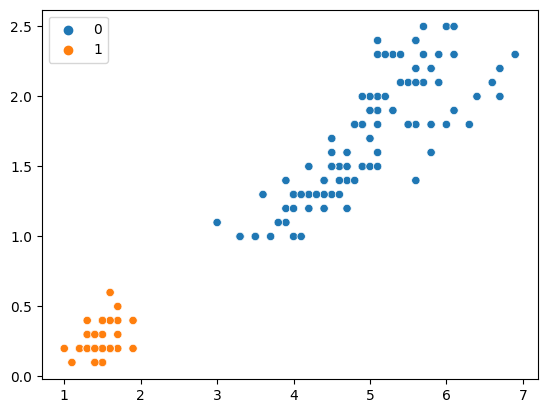

In [37]:
sns.scatterplot(x=X[:, 0], y=X[:, 1] , hue=y)

In [40]:


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

clf = Perceptron()
perceptron = Pipeline([("scaler" , StandardScaler()), ("perceptron" , Perceptron())])
perceptron.fit(X_train, y_train)

y_predicted = perceptron.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_predicted))


Accuracy : 1.0


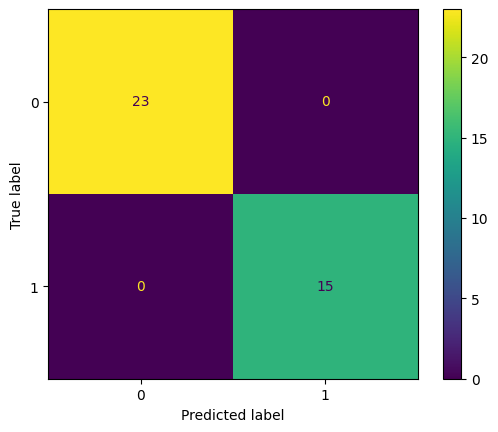

In [43]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Comprendre les réseaux de neurones sans code

La bibliothèque **Tensorflow** est une des plus utilisées pour l'appprentissage automatique fondé sur les **réseaux de neurones**. Le site Tensorflow Playground (https://playground.tensorflow.org/) permet de construire des réseaux de neurones simples sans code pour en comprendre le fonctionnement

![playground](http://playground.tensorflow.org/preview.png)

**Activité :**

*Sans couches de neurones cachés*

- Supprimer toutes les couches de neurones cachées (hidden layers)

- Choisir le jeu de données parmi les 4 proposés pour la classification binaire. Commencer par le jeu de données linéairement séparables

- Choisir les bonnes caractéristiques (features) pour obtenir une classification parfaite (loss nulle)

- Pour un jeu de données parmi les 4, la classification parfaite n'est pas possible. Pourquoi ?

*Avec neurones cachés*

- Pour le jeu de données qui n'a pas pu être classifié correctement, ajouter des couches de neurones cachés pour obtenir une classification parfaite

- Etudier le role du taux d'apprentissage, de la fonction d'activation et de la régularisation

## Le perceptron multicouche avec scikit-learn

**Activité :**

- Reprendre le jeu de données sur les iris

- Entrainer un classifieur basé sur un perceptron multicouche (MLP classifier) avec une couche de neurones cachée

- Analyser les métriques du modèle

- Modifier le nombre de couches cachées et de neurones pour améliorer le résultat

In [44]:
from sklearn.neural_network import MLPClassifier

mlpclf = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier())])
mlpclf.fit(X_train, y_train)

/Users/esdrasassikidana/miniforge3/envs/envTF2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('mlp', MLPClassifier())])

Accuracy : 1.0


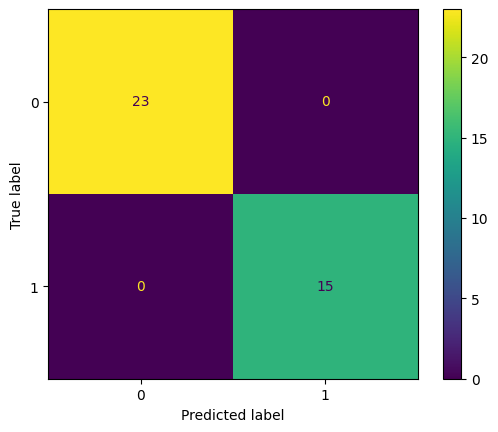

In [45]:
y_predicted = mlpclf.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_predicted))
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()